In [ ]:
pip install fastai==2.6.3

In [39]:
import fastai
fastai.__version__

'2.6.3'

In [40]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
import os
path=os.chdir('/content/drive/MyDrive')

In [43]:
path=Path.cwd()

In [44]:
path

Path('/content/drive/MyDrive')

In [45]:
path=path/'face data'
path.ls()

(#2) [Path('/content/drive/MyDrive/face data/train'),Path('/content/drive/MyDrive/face data/test')]

In [55]:
dls=ImageDataLoaders.from_folder(path, train='train', valid='test',  item_tfms=Resize(224), batch_tfms=aug_transforms(size=224))

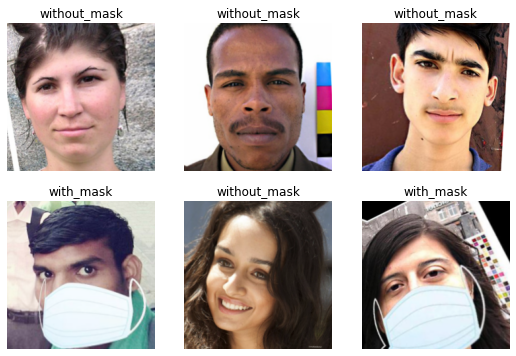

In [56]:
dls.show_batch(max_n=6)

2

In [57]:
learn=vision_learner(dls, resnet18, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
learn.summary()

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.551230,0.028106,0.989691,0.010309,00:44
1,0.253240,0.004227,1.000000,0.000000,00:18
2,0.154023,0.003380,1.000000,0.000000,00:17
3,0.106845,0.003860,1.000000,0.000000,00:18


In [133]:
learn.export('models1.pkl')

In [60]:
interp = ClassificationInterpretation.from_learner(learn)

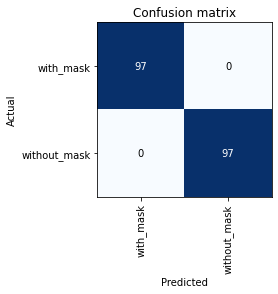

In [61]:
interp.plot_confusion_matrix()

In [70]:
import cv2
from google.colab.patches import cv2_imshow

In [79]:
img = cv2.imread('/content/30-with-mask.jpg', cv2.IMREAD_GRAYSCALE)

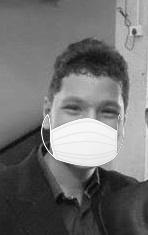

In [73]:
cv2_imshow(img)

In [75]:
what,_,probs =learn.predict(img)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a with_mask!
Probability it's a with_mask: 0.000000


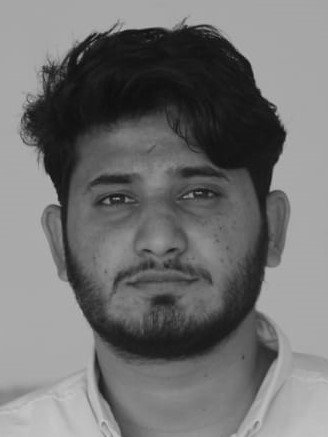

In [81]:
img2 = cv2.imread('/content/hammad1.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img2)

In [82]:
what,_,probs =learn.predict(img2)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a without_mask!
Probability it's a without_mask: 1.000000


## using export we can save our model in a folder

In [83]:
learn.save('model')

Path('/content/drive/MyDrive/face data/models/model.pth')